In [ ]:
# To install packages through Anaconda prompt / Jupyter Terminal / Command prompt
# To install xgboost
# conda install conda-forge::xgboost
# pip install xgboost
# To install shap
# conda install conda-forge::shap
# pip install shap

In [8]:
# Importing packages / functions
# For tabular data
import pandas as pd
# For generic maths
import numpy as np
from numpy import absolute
# For modeling
from xgboost import XGBRegressor
# Metrics /Functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
# Shap
import shap
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# For reproducibility 
seed = 7

In [9]:
# Importing the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Lake2.csv')

In [ ]:
# Exploring the dataset

In [10]:
mydata.head()

,T,ET,AT,P,SM,LL
0,1/1/1993,0.000015,21.98,7.936,184.207,281.535000
1,2/1/1993,0.000011,24.86,3.472,170.824,281.163333
2,3/1/1993,0.000015,28.36,37.200,163.860,280.925000
3,4/1/1993,0.000026,29.18,181.440,170.926,280.750000
4,5/1/1993,0.000032,29.03,373.860,189.816,280.585000


In [11]:
mydata.shape

(240, 6)

In [ ]:
#  Output and and input data preparation

In [12]:
# The output or target variable, y
y = mydata['LL']

In [13]:
y.shape

(240,)

In [14]:
y.head()

0    281.535000
1    281.163333
2    280.925000
3    280.750000
4    280.585000
Name: LL, dtype: float64

In [15]:
# The input variables or features 
X = mydata.drop(['T', 'LL'], axis = 1)

In [16]:
X.head()

,ET,AT,P,SM
0,0.000015,21.98,7.936,184.207
1,0.000011,24.86,3.472,170.824
2,0.000015,28.36,37.200,163.860
3,0.000026,29.18,181.440,170.926
4,0.000032,29.03,373.860,189.816


In [17]:
X.shape

(240, 4)

In [ ]:
# For research purposes, please run the VIF analysis and scale / standardize the features before the next step

In [18]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [19]:
# To check the dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 4) (72, 4) (168,) (72,)


In [ ]:
####### XGB Regression ###################
# For research putposes, please run the hyperparameter tuning using your own dataset to get the paraemters

In [20]:
# Model instantiation
model = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.01, n_estimators = 1000, subsample = 0.5)

In [21]:
# Fitting the model using the training data
xgbr = model.fit(X_train, y_train)

In [25]:
# Training model performance
y_predtr = xgbr.predict(X_train)
print('The training r-sq is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-sq is: 0.9821876321302928
The training MAE is: 0.04649444818173265
The training MSE is: 0.0037346894703522756


In [29]:
# Testing model performance
y_predts = xgbr.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.41867844676654165
The testing MAE is: 0.24166157706705527
The testing MSE: 0.11463993536623224


In [ ]:
# k-fold cross-validation

In [30]:
# On the training model
cv_tr = cross_val_score(xgbr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [31]:
cv_tr

array([-0.20231211, -0.06275969, -0.11597138, -0.32290485, -0.1343233 ,
       -0.11721534, -0.3766839 , -0.14135361, -0.18307927, -0.05535086])

In [32]:
# The absolute mean score
print('The absolute mean training cv score is:', absolute(np.mean(cv_tr)))

The absolute mean training cv score is: 0.17119543045738111


In [33]:
# On the testing model
cv_ts = cross_val_score(xgbr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [34]:
cv_ts

array([-0.0818184 , -0.08765455, -0.15083243, -0.07801821, -0.29869189,
       -0.19231432, -0.13764829, -0.05291515, -0.13777015, -0.19695592])

In [35]:
# The absolute mean score
print('The absolute mean testing cv score is:', absolute(np.mean(cv_ts)))

The absolute mean testing cv score is: 0.1414619299379647


In [36]:
########### SHAP #########################
shap.initjs()

In [37]:
# Initializing an explainer 
explainer = shap.TreeExplainer(xgbr)

In [39]:
# Calculating the shap values for the traing data
shap_valuestr = explainer.shap_values(X_train)

In [40]:
shap_valuestr # To output shap values

array([[-0.0467266 ,  0.05312422,  0.00681062, -0.00631998],
       [ 0.0596732 ,  0.20832516, -0.06903379,  0.2323105 ],
       [-0.08599511, -0.05244714,  0.02447967, -0.1876347 ],
       [-0.12579119, -0.16725053, -0.03736059, -0.17660876],
       [-0.19917691, -0.01180107, -0.32406482, -0.07260025],
       [ 0.02481092, -0.23190112, -0.05187111, -0.15566413],
       [-0.23164296, -0.18633497, -0.26063532,  0.04176413],
       [ 0.06297929,  0.06598794,  0.09162063, -0.11108001],
       [ 0.00460493,  0.02531263, -0.32572684, -0.08031227],
       [-0.2280264 , -0.14810917, -0.29443657, -0.02330859],
       [ 0.03298676, -0.30547738,  0.01216275, -0.12486913],
       [ 0.03604343,  0.07512817,  0.2061148 , -0.01121651],
       [ 0.0139748 ,  0.05354834,  0.24170871, -0.06557279],
       [ 0.03380493,  0.07343109,  0.08972143, -0.09215751],
       [-0.07985202, -0.16678883, -0.04291284, -0.15648219],
       [ 0.05836085, -0.09031477,  0.03892762, -0.09124701],
       [ 0.09088582,  0.

In [ ]:
# Some most important shap plots

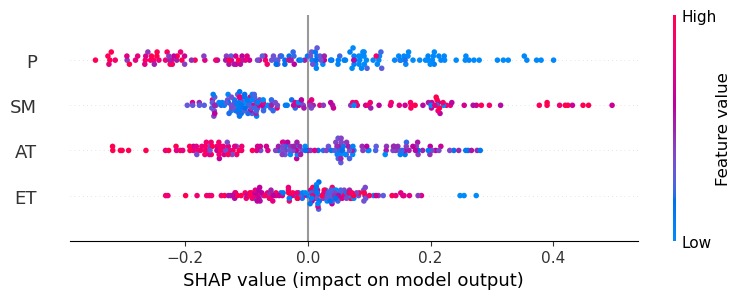

In [41]:
# Summary plot = the combination of the feature importance and feature effectbplots
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

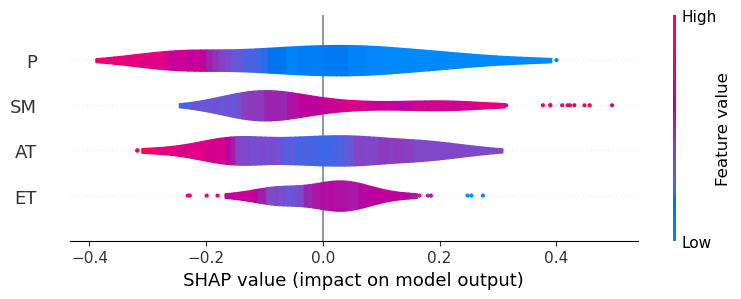

In [42]:
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'violin')

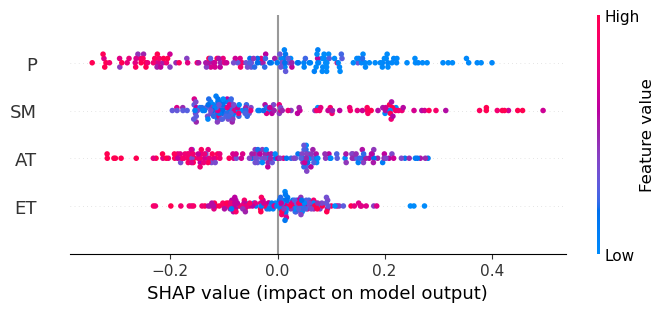

In [43]:
# Bees warm plot
shap.plots.beeswarm(explainer(X_train))

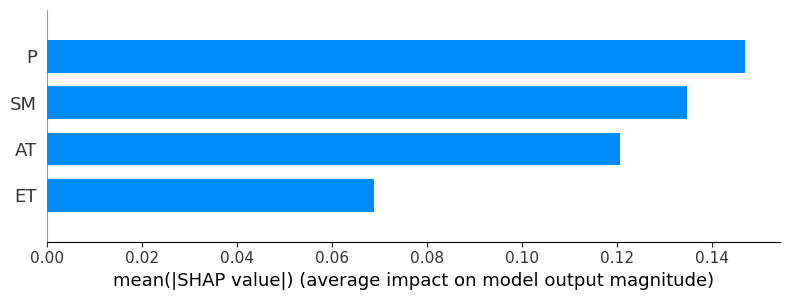

In [44]:
# The feature importance plot
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')


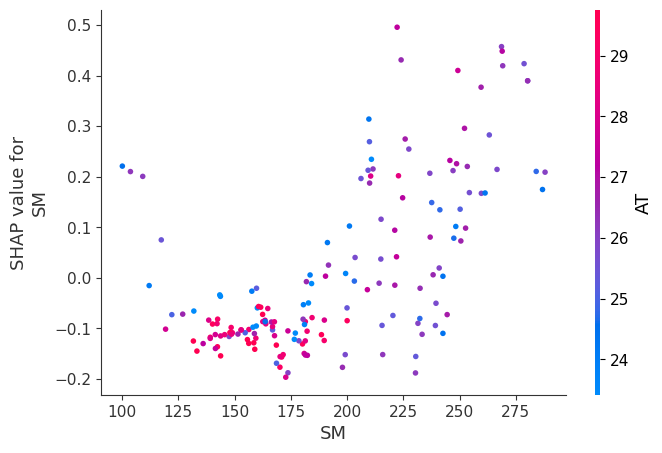

In [46]:
# Dependence plot
shap.dependence_plot(3, shap_valuestr, X_train, feature_names = X_train.columns)

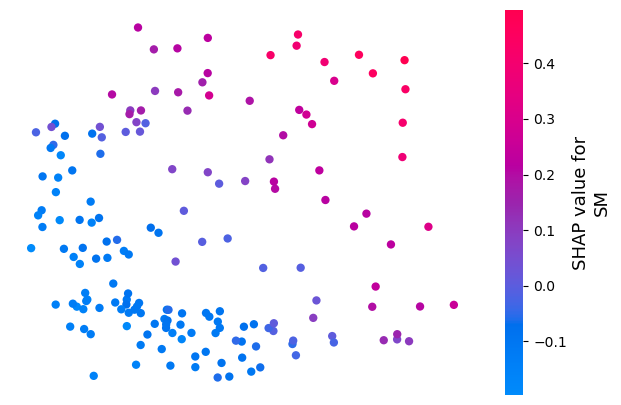

In [49]:
# Embedding plot = 2D projection of shap values using PCA for visualization
shap.embedding_plot('SM', explainer.shap_values(X_train), feature_names = X_train.columns)

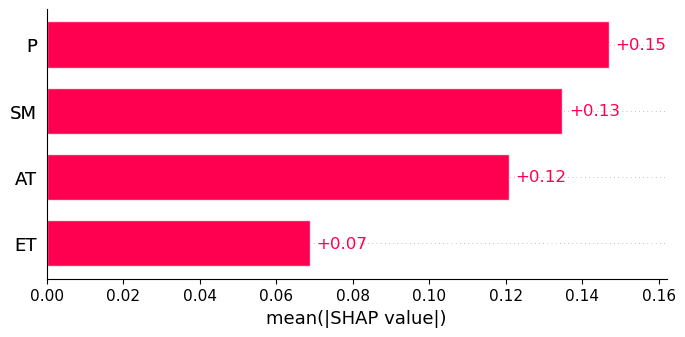

In [51]:
# Global plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

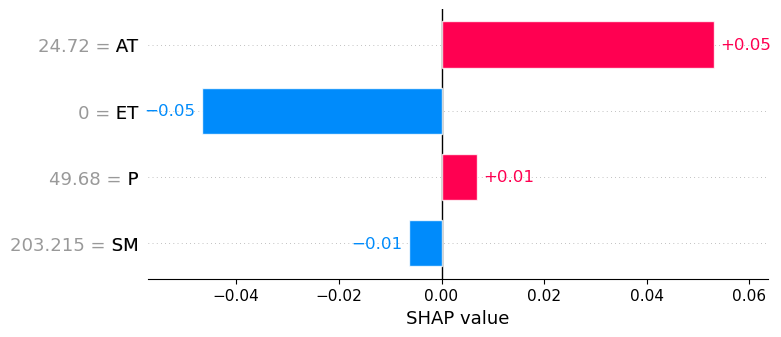

In [52]:
# Local plot
shap.plots.bar(shap_valuestr[0])

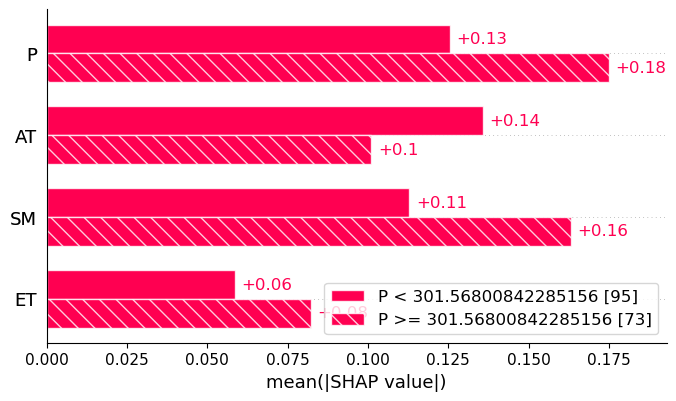

In [53]:
# Auto-cohort plot
shap.plots.bar(shap_valuestr.cohorts(2).abs.mean(0))

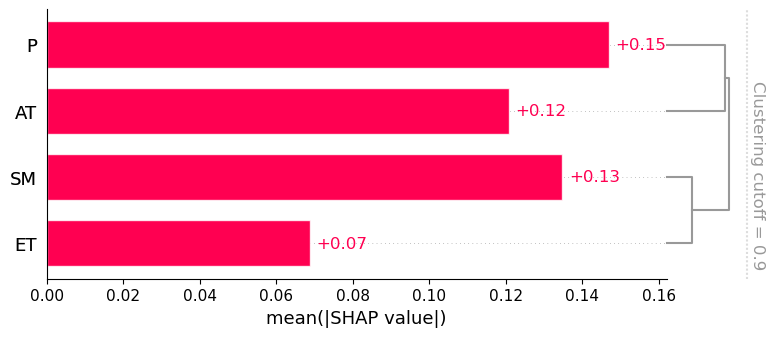

In [57]:
# Feature clustering
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_valuestr, clustering = clustering, clustering_cutoff = 0.9)

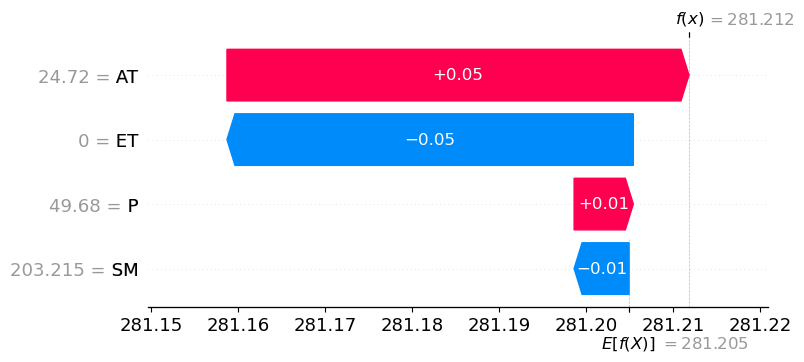

In [58]:
# Waterfall plot
shap.plots.waterfall(shap_valuestr[0])

In [59]:
# Force plot
shap.plots.force(shap_valuestr[0])

In [60]:
# The shap values on the testing data
shap_valuests = explainer(X_test)

In [61]:
shap_valuests

.values =
array([[ 1.26410812e-01,  9.25346166e-02,  2.12194577e-01,
        -6.84339181e-02],
       [-7.61991069e-02,  8.85064714e-03, -2.68819243e-01,
         2.07069471e-01],
       [ 1.22859387e-03,  1.10803381e-01,  1.43016145e-01,
        -9.57341045e-02],
       [-9.71764326e-02, -2.78202534e-01, -1.15728853e-02,
        -1.46785453e-01],
       [-3.45316716e-02,  3.37609393e-03,  9.45630595e-02,
        -1.13319671e-02],
       [ 4.28293347e-02, -1.40971303e-01,  2.07987785e-01,
        -8.11333805e-02],
       [ 6.08985238e-02,  8.18034634e-02, -1.47342965e-01,
         1.43072903e-01],
       [ 7.80042186e-02,  2.52151042e-01,  5.52085489e-02,
        -6.17448539e-02],
       [-6.17862977e-02,  9.53810588e-02, -3.74495685e-02,
        -3.00863590e-02],
       [ 5.93691040e-03, -2.35707477e-01, -8.52740183e-03,
        -1.17787421e-01],
       [-1.58127293e-01,  2.08400004e-03, -3.13183486e-01,
        -1.36127397e-01],
       [-7.88923502e-02, -2.00237483e-01, -3.94299887e-

In [ ]:
# Some most important shap plots

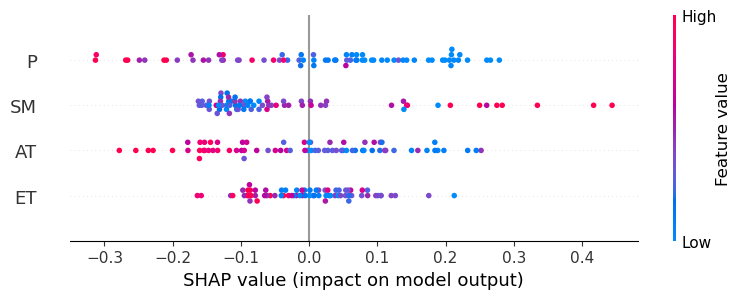

In [62]:
# Summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns)

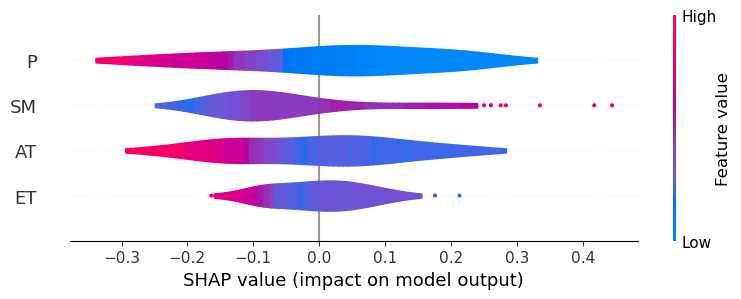

In [63]:
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'violin')

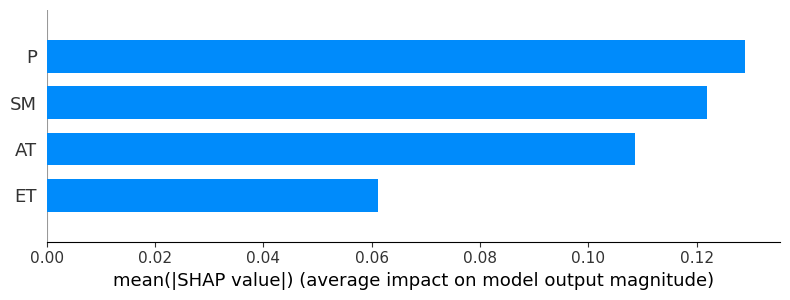

In [64]:
# Feature importance plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar')

In [67]:
# Dependence plot
# shap.dependence_plot(3, shap_valuests, X_test, feature_names = X_test.columns)

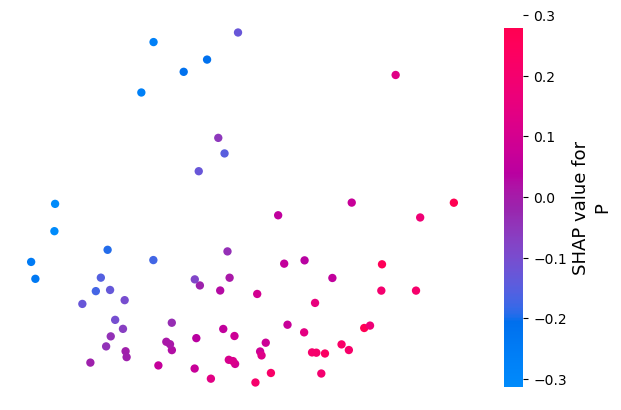

In [68]:
# Embedding plot
shap.embedding_plot('P', explainer.shap_values(X_test), feature_names = X_test.columns)

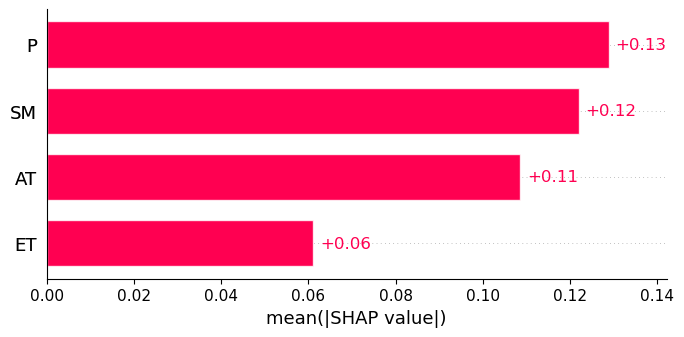

In [70]:
# Global plot
shap_valuests = explainer(X_test)
shap.plots.bar(shap_valuests)

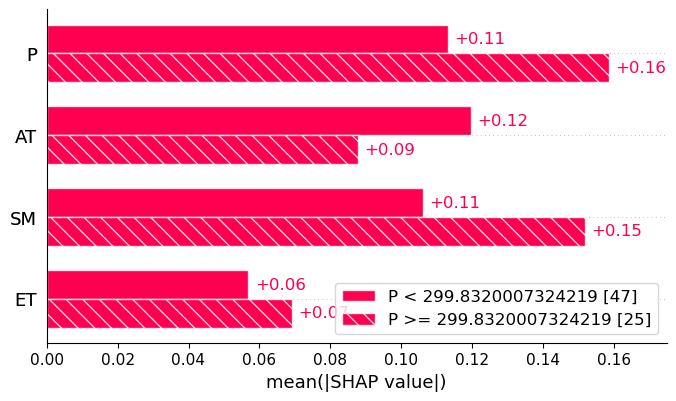

In [71]:
# Auto-cohort plot
shap.plots.bar(shap_valuests.cohorts(2).abs.mean(0))

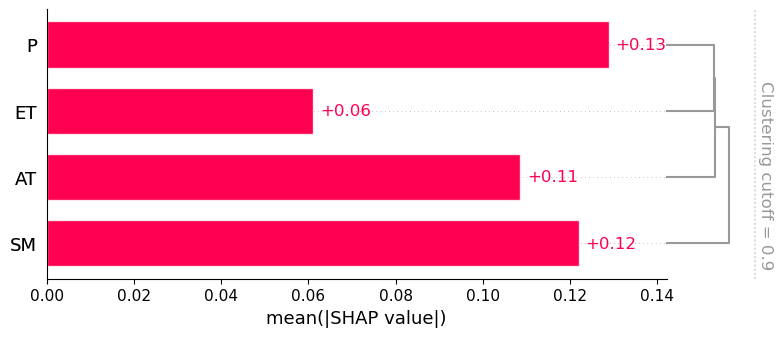

In [74]:
# Feature clustering
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering, clustering_cutoff = 0.9)